In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('USGS_Earthquake_Dataset_2000-2025_feature_engineered.csv')
df = df.drop(columns=['day','local_density'])

In [10]:
df.head()

,latitude,longitude,depth,mag,cluster_id,elapsed_years,month_sin,month_cos,cluster_activity
0,-8.160,120.485,200.0,4.7,0,3,-2.449294e-16,1.0,55169
1,47.088,154.231,33.0,4.7,0,3,-2.449294e-16,1.0,55169
2,-29.940,-177.605,33.0,4.7,1,3,-2.449294e-16,1.0,25512
3,46.851,154.066,33.0,4.5,0,3,-2.449294e-16,1.0,55169
4,47.084,154.202,33.0,5.1,0,3,-2.449294e-16,1.0,55169


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('mag',axis =1)
Y = df['mag']

# We split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
    )



In [12]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 300 , random_state = 42)
model.fit(X_train,Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# We predict the models results with the test part
y_pred = model.predict(X_test)

#Evaluate the Predictions
print(f'Mean Absolute Error: {mean_absolute_error(Y_test,y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(Y_test,y_pred)}')
print(f'R² Score: {r2_score(Y_test,y_pred)}')

Mean Absolute Error: 0.2677836787913407
Mean Squared Error: 0.1417788248624411
R² Score: 0.062166057827962806


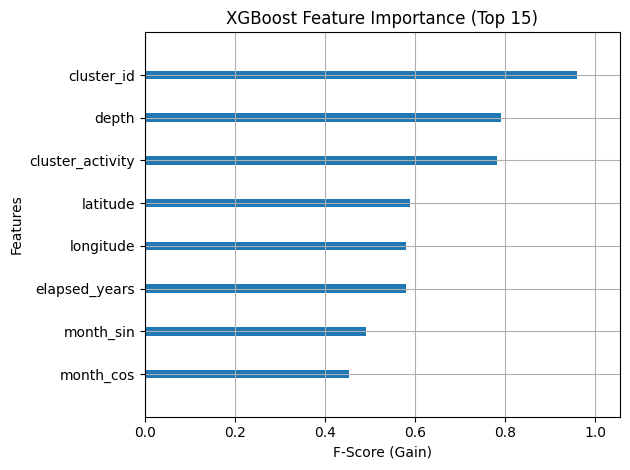

In [14]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, importance_type='gain', show_values=False, max_num_features=15)
plt.title("XGBoost Feature Importance (Top 15)")
plt.ylabel("Features")
plt.xlabel("F-Score (Gain)")
plt.tight_layout()
plt.show()